In [1]:
#Importing Environment and ImpStates
from env_2_stochastic_medium import Environment2,StartandGoal,ImportDynamics
from SophAgent import SophAgentActions
from QlearningAgent import QAgent
[startstate,goalstate]=StartandGoal()
#Btrue is only used for plotting-model Accuracy
Btrue=ImportDynamics()

In [2]:
import numpy as np
import math
import random

#startstate
start=startstate
#goal-state
goal=goalstate

#Paramters
numS=70
numA=8
T_min=2
T_max=25

In [3]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [4]:
#Experimenting success rate of Q_Agent from T=1 to T-15 training loops=5000
SuccessRateQ10K=[]
training_loops=10000
test_trials=1000
for ii in range(T_min,T_max):
    T=ii
    #Retrieving action selection matrix from SophAgent
    QLearned=QAgent(T,training_loops)

    score=0
    for j in range(test_trials):
    
        #episode-start
        state=startstate
        for i in range(0,T-1):
            kingsmoves=[0,1,2,3,4,5,6,7]
            action=np.argmax(QLearned[state,:])
            rew,new_state=Environment2(state,action)
            state=new_state
            if(new_state==goalstate):
                score+=1
                break
                
    SuccessRateQ10K.append(score/test_trials)

In [5]:
#Learning
trials=5000
b=np.zeros((numA,numS,numS))
Blearned=np.zeros((numS,numA,numS))

Time_horizon=[]
modeldeviation5K=[]
successrate5K=[]

for jj in range(T_min,T_max):
    T=jj
    Time_horizon.append(jj)
    for ii in range(trials):

        act=np.zeros((T-1))
        stmo=np.zeros((T-1))
        st=np.zeros((T-1))

        state=startstate
        for i in range(T-1):
            action=random.randint(0,7)
            act[i]=action
            stmo[i]=state
            rew,next_state=Environment2(state,action)
            st[i]=next_state
            state=next_state

        for i in range(numA):
            for j in range(T-1):
                for k in range(numA):
                    if(i==act[j]):
                        stvec=np.zeros((numS,1))
                        stvec[int(st[j])]=1
                        stmovec=np.zeros((1,numS))
                        stmovec[0,int(stmo[j])]=1
                        b[i,:,:]+=0.125*np.kron(stvec,stmovec)

        for i in range(numA):
            for j in range(numS):
                Blearned[j,i,:]=softmax(b[i,:,j])

    modeldeviation5K.append(np.linalg.norm(Blearned-Btrue))

    Qpi=SophAgentActions(T,Blearned)

    test_trials=1000
    score=0
    for ii in range(test_trials):
        state=startstate
        for i in range(T-1):
            action=np.random.choice([0,1,2,3,4,5,6,7],p=Qpi[i,:,state])
            rew,next_state=Environment2(state,action)

            #print(state,action)
            state=next_state
            if(state==goalstate):
                score+=1
                break
    successrate5K.append(score/test_trials)

In [6]:
#Learning
trials=10000
b=np.zeros((numA,numS,numS))
Blearned=np.zeros((numS,numA,numS))

modeldeviation10K=[]
successrate10K=[]

for jj in range(T_min,T_max):
    T=jj
    for ii in range(trials):

        act=np.zeros((T-1))
        stmo=np.zeros((T-1))
        st=np.zeros((T-1))

        state=startstate
        for i in range(T-1):
            action=random.randint(0,7)
            act[i]=action
            stmo[i]=state
            rew,next_state=Environment2(state,action)
            st[i]=next_state
            state=next_state

        for i in range(numA):
            for j in range(T-1):
                for k in range(numA):
                    if(i==act[j]):
                        stvec=np.zeros((numS,1))
                        stvec[int(st[j])]=1
                        stmovec=np.zeros((1,numS))
                        stmovec[0,int(stmo[j])]=1
                        b[i,:,:]+=0.125*np.kron(stvec,stmovec)

        for i in range(numA):
            for j in range(numS):
                Blearned[j,i,:]=softmax(b[i,:,j])

    modeldeviation10K.append(np.linalg.norm(Blearned-Btrue))

    Qpi=SophAgentActions(T,Blearned)

    test_trials=1000
    score=0
    for ii in range(test_trials):
        state=startstate
        for i in range(T-1):
            action=np.random.choice([0,1,2,3,4,5,6,7],p=Qpi[i,:,state])
            rew,next_state=Environment2(state,action)

            #print(state,action)
            state=next_state
            if(state==goalstate):
                score+=1
                break
    successrate10K.append(score/test_trials)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


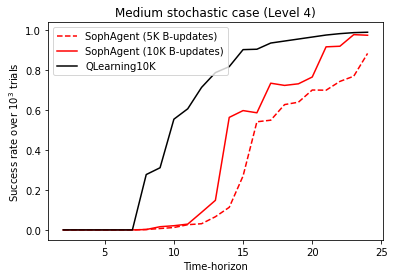

In [14]:
import matplotlib.pyplot as plt
plt.plot(Time_horizon,successrate5K,linestyle='--',color='red')
plt.plot(Time_horizon,successrate10K,linestyle='-',color='red')
plt.plot(Time_horizon,SuccessRateQ10K,color='black')
plt.legend(["SophAgent (5K B-updates)","SophAgent (10K B-updates)","QLearning10K"])
plt.title("Medium stochastic case (Level 4)")
plt.xlabel("Time-horizon")
plt.ylabel("Success rate over $10^3$ trials")
plt.savefig('ResultsLevel-4BA.eps',format='eps', dpi=500, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


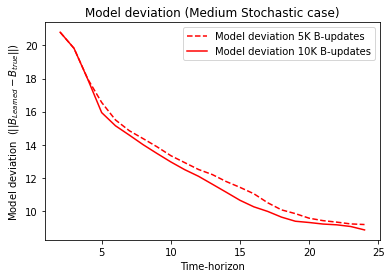

In [13]:
plt.plot(Time_horizon,modeldeviation5K,linestyle='--',color='red')
plt.plot(Time_horizon,modeldeviation10K,linestyle='-',color='red')
plt.legend(["Model deviation 5K B-updates", "Model deviation 10K B-updates"])
plt.title("Model deviation (Medium Stochastic case)")
plt.xlabel("Time-horizon")
plt.ylabel("Model deviation  $(||B_{Learned} - B_{true}||)$")
plt.savefig('ResultsLevel-4BB.eps',format='eps', dpi=500, bbox_inches='tight')